In [1]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from src.nonlinear_approx import rand_idx, get_phi, rbf

from scipy.integrate import solve_ivp

from src.time_delay_plot import *

%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
# read dataset
takens_df = pd.read_csv('datasets/takens_1.txt',delim_whitespace=True, names=["x", "y"])
takens_data = np.array(takens_df,dtype=float)
x0 = takens_data[:, 0]
x1 = takens_data[:, 1]

In [3]:
x0.shape

(1000,)

# Part 1

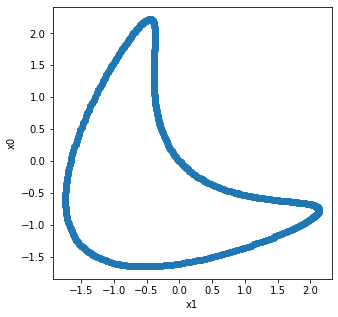

In [4]:
plt.figure(figsize=(5, 5))
plt.scatter(x1, x0)
plt.xlabel("x1")
plt.ylabel("x0")
plt.show()

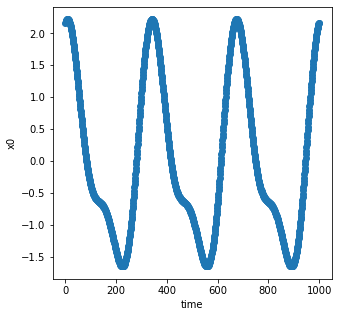

In [5]:
plt.figure(figsize=(5, 5))
plt.scatter(np.array(range(len(x0))), x0)
plt.xlabel("time")
plt.ylabel("x0")
plt.show()

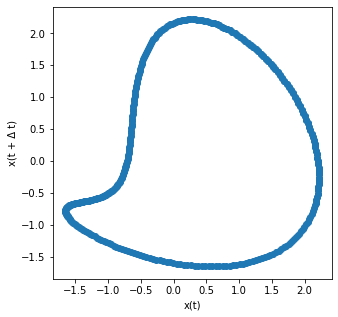

In [6]:
plot_time_delay(x0,600)

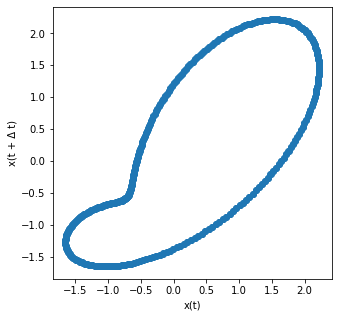

In [7]:
plot_time_delay(x0,300)

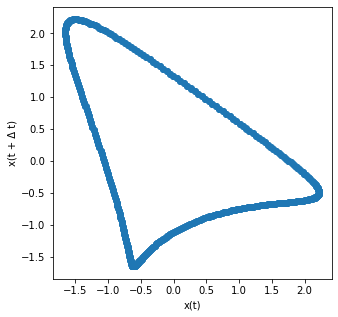

In [8]:
plot_time_delay(x0,100)

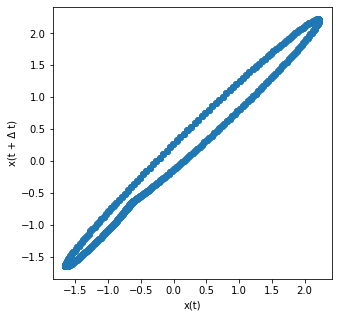

In [9]:
plot_time_delay(x0,5)

## Part Two

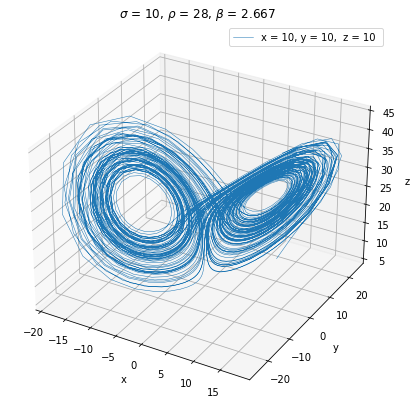

In [10]:
rho = 28
sigma = 10
beta = 8./3
y0 = np.array([10, 10, 10])

simulation_time = 100
resolution = 3000
sol = plot_lorenz_burfication(y0, rho, sigma, beta, simulation_time, resolution)

<Figure size 360x360 with 0 Axes>

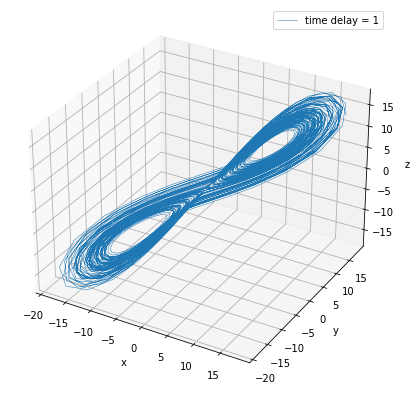

<Figure size 360x360 with 0 Axes>

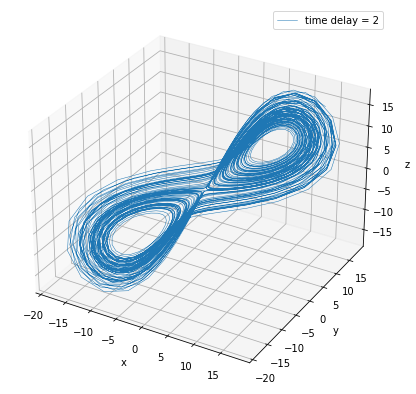

<Figure size 360x360 with 0 Axes>

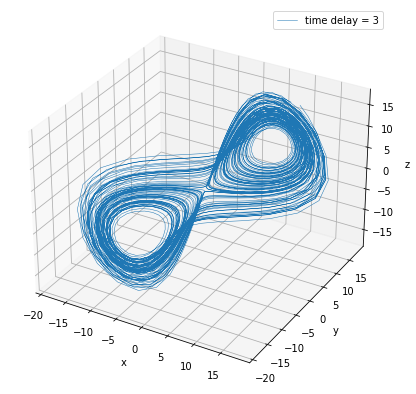

<Figure size 360x360 with 0 Axes>

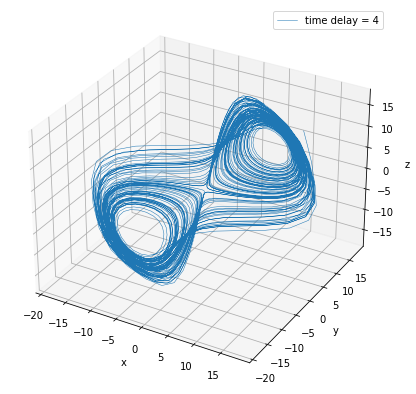

<Figure size 360x360 with 0 Axes>

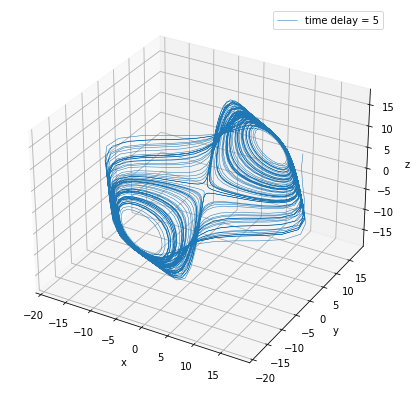

<Figure size 360x360 with 0 Axes>

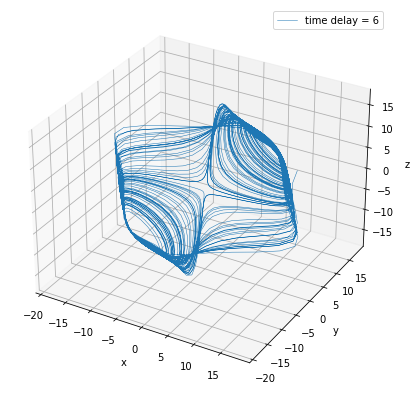

<Figure size 360x360 with 0 Axes>

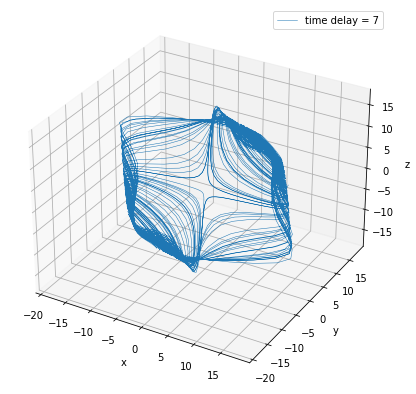

<Figure size 360x360 with 0 Axes>

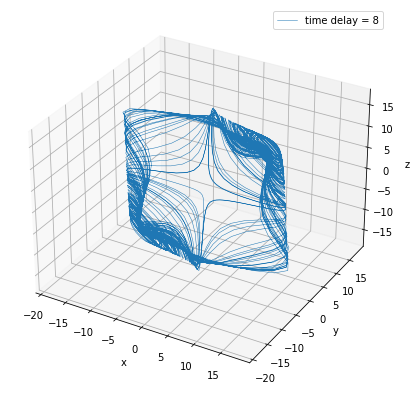

<Figure size 360x360 with 0 Axes>

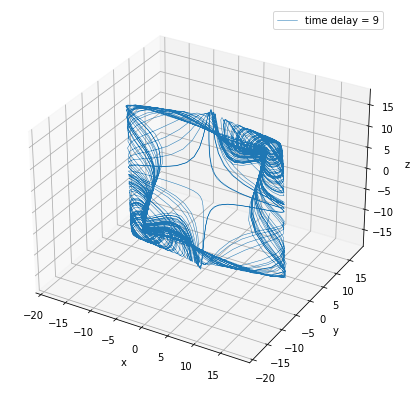

<Figure size 360x360 with 0 Axes>

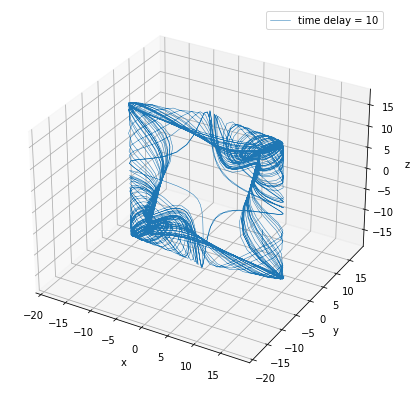

<Figure size 360x360 with 0 Axes>

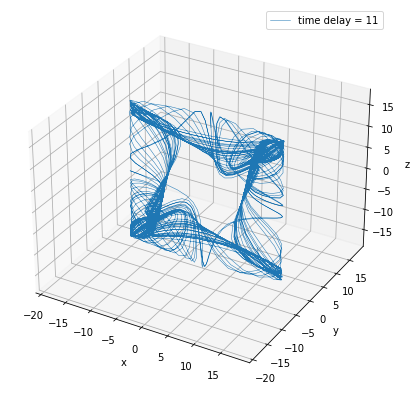

<Figure size 360x360 with 0 Axes>

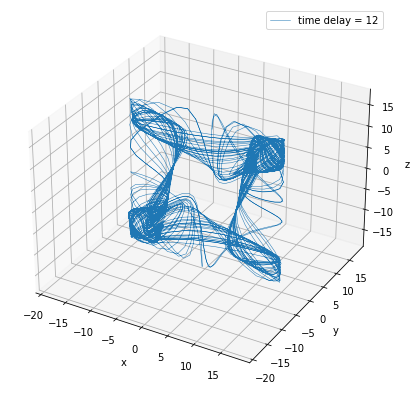

<Figure size 360x360 with 0 Axes>

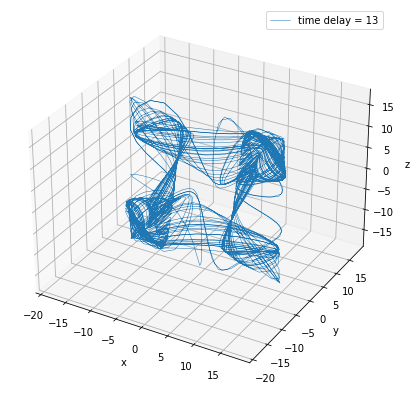

<Figure size 360x360 with 0 Axes>

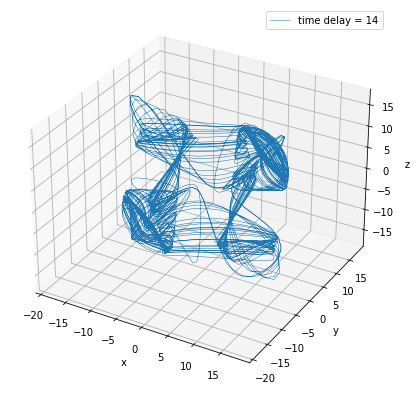

<Figure size 360x360 with 0 Axes>

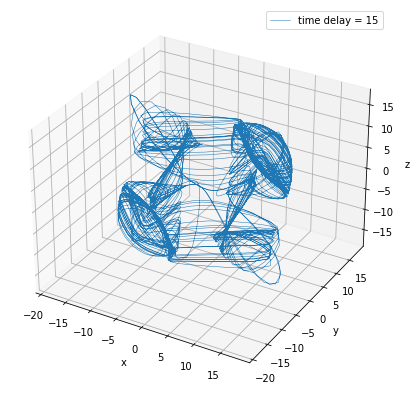

<Figure size 360x360 with 0 Axes>

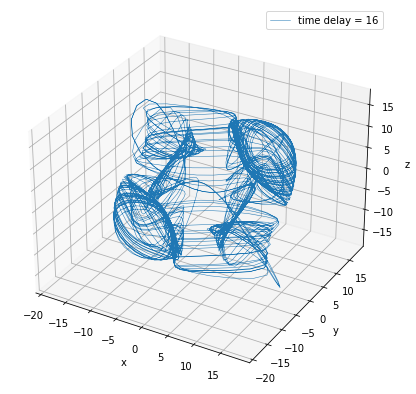

<Figure size 360x360 with 0 Axes>

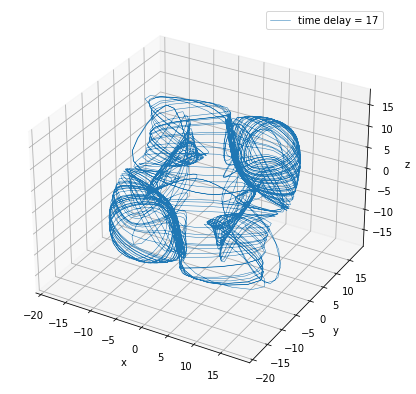

<Figure size 360x360 with 0 Axes>

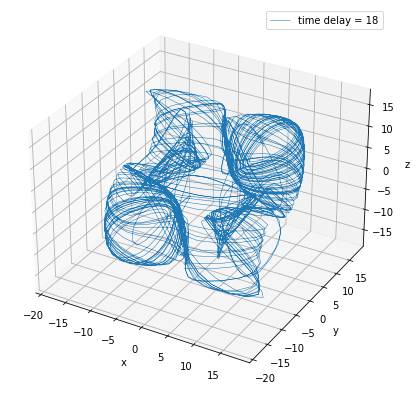

<Figure size 360x360 with 0 Axes>

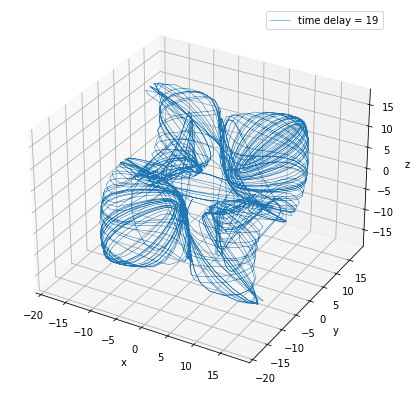

In [11]:
# time delay embedding for x coordinate
for i in range(1, 20):
    plot_time_delay_3d(sol.y[0], i)

<Figure size 360x360 with 0 Axes>

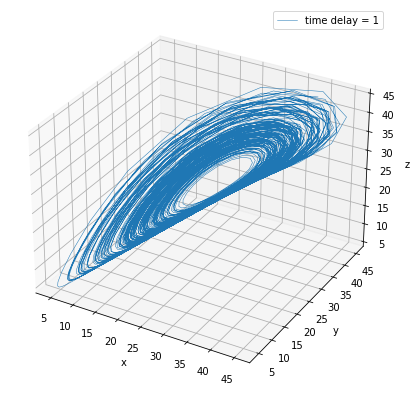

<Figure size 360x360 with 0 Axes>

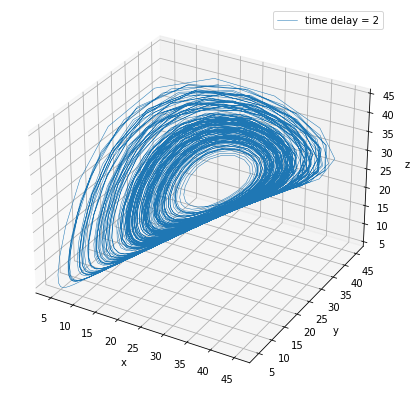

<Figure size 360x360 with 0 Axes>

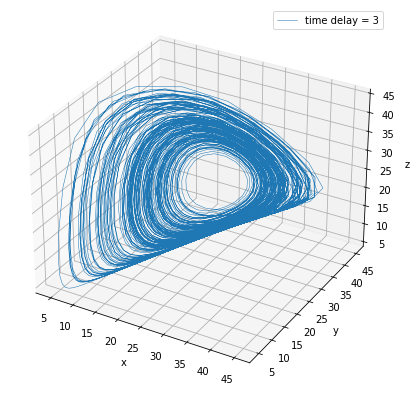

<Figure size 360x360 with 0 Axes>

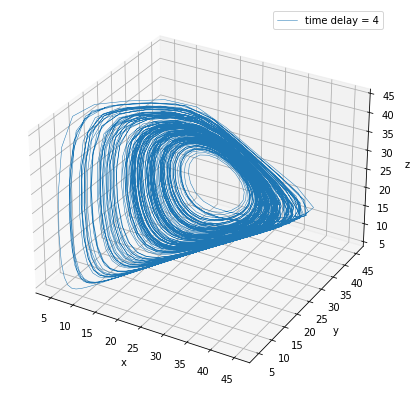

<Figure size 360x360 with 0 Axes>

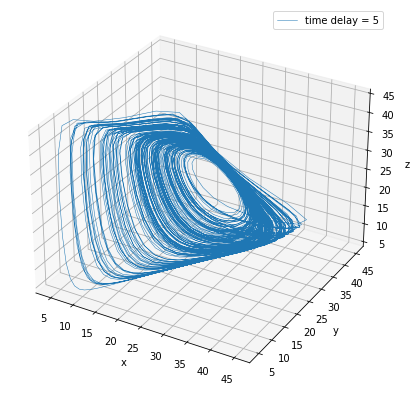

<Figure size 360x360 with 0 Axes>

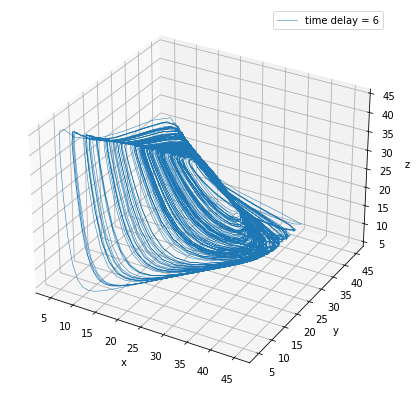

<Figure size 360x360 with 0 Axes>

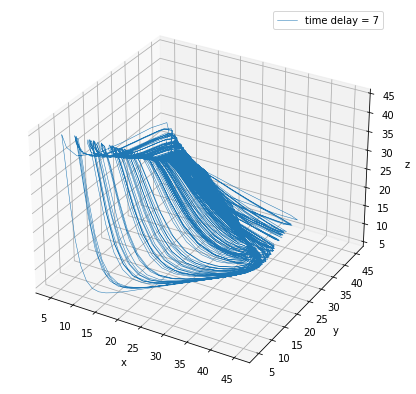

<Figure size 360x360 with 0 Axes>

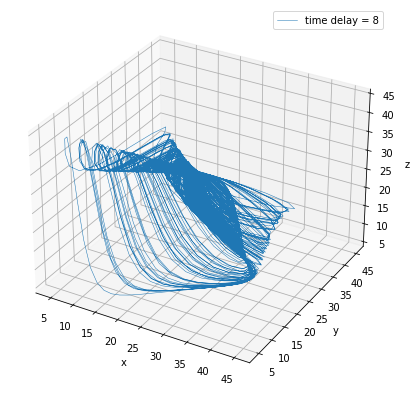

<Figure size 360x360 with 0 Axes>

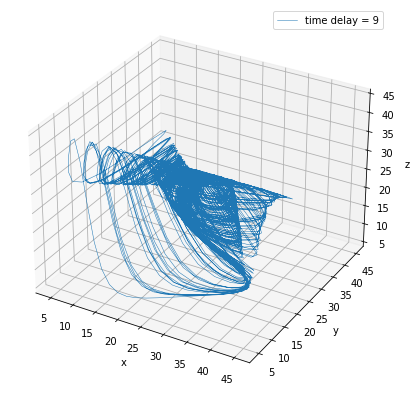

<Figure size 360x360 with 0 Axes>

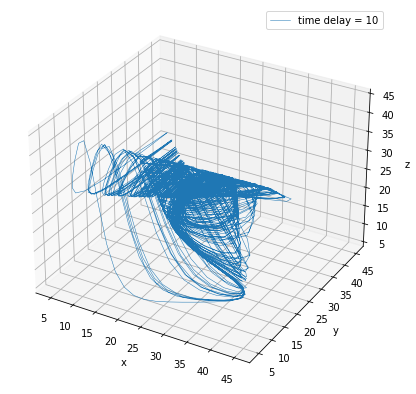

<Figure size 360x360 with 0 Axes>

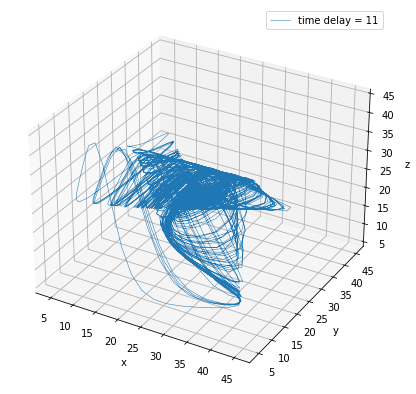

<Figure size 360x360 with 0 Axes>

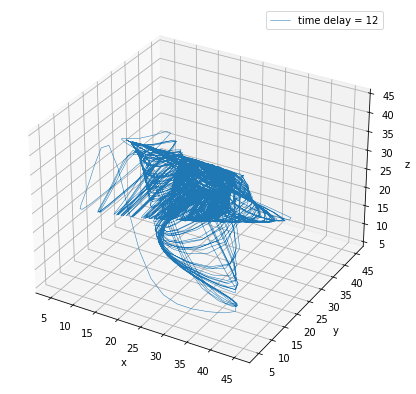

<Figure size 360x360 with 0 Axes>

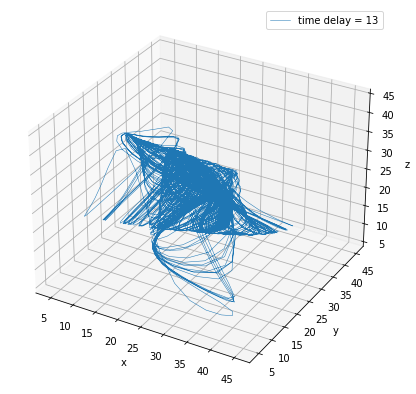

<Figure size 360x360 with 0 Axes>

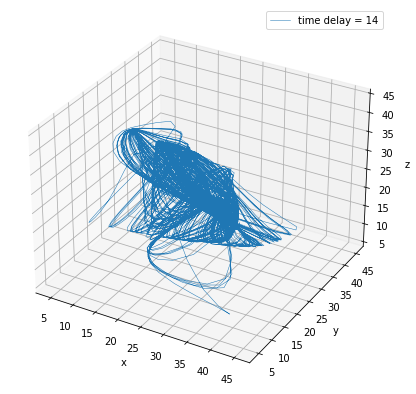

<Figure size 360x360 with 0 Axes>

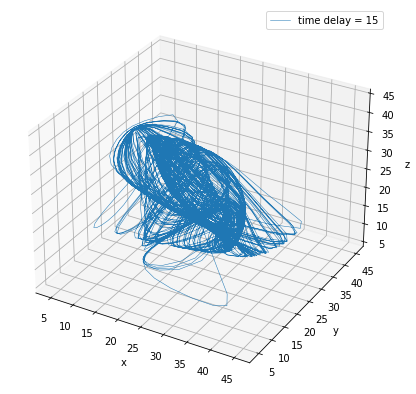

<Figure size 360x360 with 0 Axes>

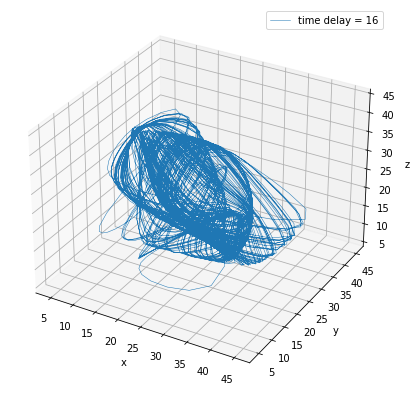

<Figure size 360x360 with 0 Axes>

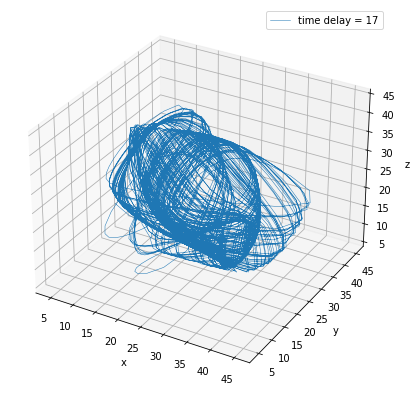

<Figure size 360x360 with 0 Axes>

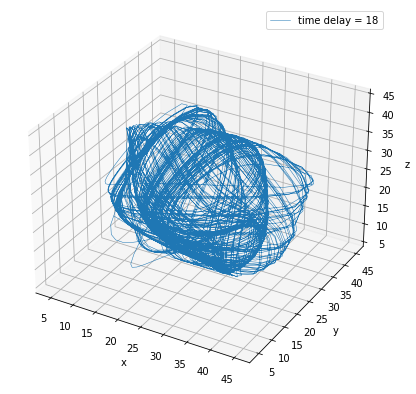

<Figure size 360x360 with 0 Axes>

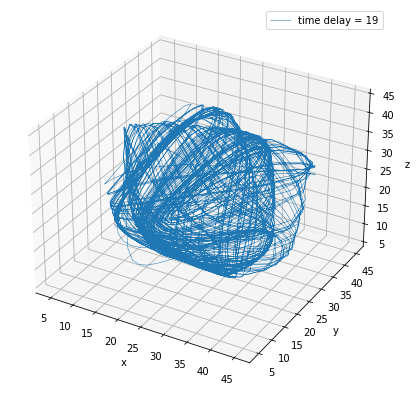

In [12]:
# time delay embedding for z coordinate
for i in range(1, 20):
    plot_time_delay_3d(sol.y[2], i)

## Bonus

In [13]:
'''
v_x = sol.y[0][1:resolution] - sol.y[0][0:resolution-1]
v_y = sol.y[1][1:resolution] - sol.y[1][0:resolution-1]
v_z = sol.y[2][1:resolution] - sol.y[2][0:resolution-1]
lorenz_v = np.concatenate((v_x,v_y,v_z), axis=0).reshape(3, -1).T
'''

'\nv_x = sol.y[0][1:resolution] - sol.y[0][0:resolution-1]\nv_y = sol.y[1][1:resolution] - sol.y[1][0:resolution-1]\nv_z = sol.y[2][1:resolution] - sol.y[2][0:resolution-1]\nlorenz_v = np.concatenate((v_x,v_y,v_z), axis=0).reshape(3, -1).T\n'

In [14]:
'''
x = sol.y[0][0:resolution-1]
y = sol.y[1][0:resolution-1]
z = sol.y[2][:resolution-1]
lorenz_data = np.concatenate((x,y,z), axis=0).reshape(3, -1).T
'''

'\nx = sol.y[0][0:resolution-1]\ny = sol.y[1][0:resolution-1]\nz = sol.y[2][:resolution-1]\nlorenz_data = np.concatenate((x,y,z), axis=0).reshape(3, -1).T\n'

In [15]:
'''
# visualize flow
fig = plt.figure(figsize=(8, 8))
ax = fig.gca(projection='3d')
ax.quiver(x, y, z, v_x, v_y, v_z, length=2)
'''

"\n# visualize flow\nfig = plt.figure(figsize=(8, 8))\nax = fig.gca(projection='3d')\nax.quiver(x, y, z, v_x, v_y, v_z, length=2)\n"

In [16]:
'''
nr_xl = 100
nr = x.shape[0]
id_xl = rand_idx(x, nr_xl)
phi = get_phi(lorenz_data, id_xl, lorenz_data, 4)
C = np.linalg.lstsq(phi, lorenz_v, rcond=None)[0]
C.shape
'''

'\nnr_xl = 100\nnr = x.shape[0]\nid_xl = rand_idx(x, nr_xl)\nphi = get_phi(lorenz_data, id_xl, lorenz_data, 4)\nC = np.linalg.lstsq(phi, lorenz_v, rcond=None)[0]\nC.shape\n'

In [17]:
'''
eps = 4
eq = lambda t, x: get_phi(lorenz_data, id_xl, x.reshape((1, 3)), eps) @ C

t = np.linspace(0, simulation_time, resolution)
t_span = [t[0], t[-1]]
sol = solve_ivp(eq, t_span=t_span, t_eval=t, y0=lorenz_data[0, :])
'''

'\neps = 4\neq = lambda t, x: get_phi(lorenz_data, id_xl, x.reshape((1, 3)), eps) @ C\n\nt = np.linspace(0, simulation_time, resolution)\nt_span = [t[0], t[-1]]\nsol = solve_ivp(eq, t_span=t_span, t_eval=t, y0=lorenz_data[0, :])\n'

In [18]:
'''
fig = plt.figure(figsize=(7, 7))
ax3 = fig.gca(projection='3d')

ax3.plot(sol.y[0], sol.y[1],sol.y[2], linewidth=0.5)
'''

"\nfig = plt.figure(figsize=(7, 7))\nax3 = fig.gca(projection='3d')\n\nax3.plot(sol.y[0], sol.y[1],sol.y[2], linewidth=0.5)\n"

In [19]:
x_o = sol.y[0]
points_len = x_o.shape[0]
x = x_o[:points_len - 2*3]
y = x_o[3: points_len - 3]
z = x_o[2*3: points_len]

v_x = x[1:] - x[0:-1]
v_y = y[1:] - y[0:-1]
v_z = z[1:] - z[0:-1]
lorenz_v = np.concatenate((v_x,v_y,v_z), axis=0).reshape(3, -1).T

x = x[0:-1]
y = y[0:-1]
z = z[0:-1]
lorenz_data = np.concatenate((x,y,z), axis=0).reshape(3, -1).T

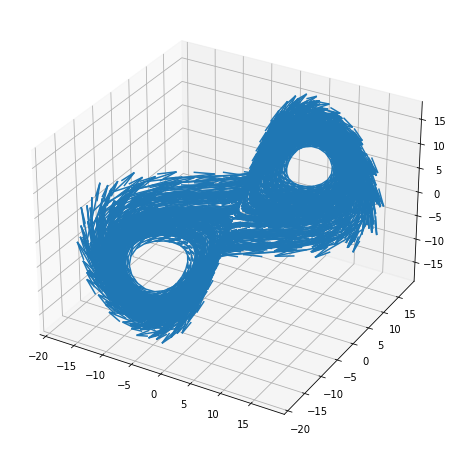

In [20]:
# visualize flow
fig = plt.figure(figsize=(8, 8))
ax = fig.gca(projection='3d')
ax.quiver(x, y, z, v_x, v_y, v_z, length=2)

In [25]:
eps = 20
nr_xl = 20
nr = x.shape[0]
id_xl = rand_idx(x, nr_xl)
phi = get_phi(lorenz_data, id_xl, lorenz_data, eps)
C = np.linalg.lstsq(phi, lorenz_v, rcond=None)[0]
C.shape

(20, 3)

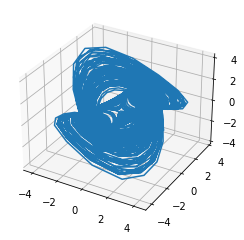

In [26]:
v = phi @ C
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot3D(v[:,0], v[:,1], v[:,2])

In [27]:
eq = lambda t, x: get_phi(lorenz_data, id_xl, x.reshape((1, 3)), eps) @ C

t = np.linspace(0, simulation_time, resolution)
t_span = [t[0], t[-1]]
sol = solve_ivp(eq, t_span=t_span, t_eval=t, y0=lorenz_data[0, :])

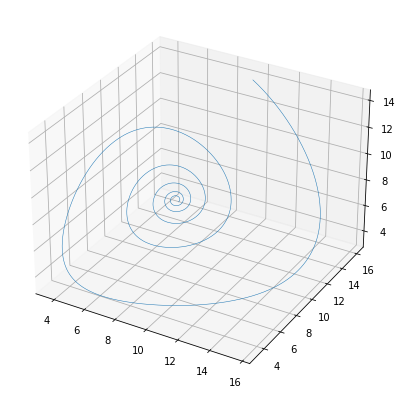

In [28]:
fig = plt.figure(figsize=(7, 7))
ax3 = fig.gca(projection='3d')

ax3.plot(sol.y[0], sol.y[1],sol.y[2], linewidth=0.5)